In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import lineStyles


# DEFINICION DE INTEGRADOR TEMPORAL
def RK4_FD(eq, fields, parameters, grids, dt, Nt, operators, t_rate): #implementa rouge-kutta
    t_grid = grids[0]
    x_grid = grids[1]
    y_grid = grids[2]
    fields_history = []
    time_grid = []
    for i in range(Nt - 1):
        old_fields = fields
        k_1 = equations_FD(eq, old_fields, t_grid[i], x_grid, y_grid, parameters, operators)
        k_2 = equations_FD(eq, old_fields + 0.5 * dt * k_1, t_grid[i], x_grid, y_grid, parameters, operators)
        k_3 = equations_FD(eq, old_fields + 0.5 * dt * k_2, t_grid[i], x_grid, y_grid, parameters, operators)
        k_4 = equations_FD(eq, old_fields + dt * k_3, t_grid[i], x_grid, y_grid, parameters, operators)
        new_fields = old_fields + dt * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
        fields = new_fields
        if i % t_rate == 0:
            fields_history.append(fields)
            time_grid.append(t_grid[i])
    return fields, fields_history, time_grid

# DEFINICION DE SISTEMA DE ECUACIONES
def equations_FD(eq, field_slices, t_i, x_grid, y_grid, parameters, operators): #ecuaciones
    if eq == "PT_waveguide":
        U = field_slices[0]
        V = field_slices[1]

        k = parameters[0]
        gamma = parameters[1]
        beta = parameters[2]
        delta = parameters[3]

        F = 1j * k * V - 1j * gamma * (U / (1 + np.abs(U) ** 2)) + (beta + 1j * delta) * U
        G = 1j * k * U - 1j * gamma * (V / (1 + np.abs(V) ** 2)) - (beta + 1j * delta) * V

        fields = np.array([F, G])
    return fields

In [41]:
eq = "PT_waveguide"
t_rate = 0.025

# PARAMETROS (GAMMA = POTENCIAL, K = ACOPLE, ALPHA = GAIN - LOSS)
gamma = 10
k = 1.0
beta = 0.0
delta = 0.07

# PARAMETROS INICIALES (P = CANTIDAD CONSERVADA, X = PORCENTAJE DE INFORMACIÓN INICIAL EN DIMERO 2) ####### Vale pico esto, encuentra los puntos estacionarios como la gente
N = 21.0
theta_0 = 0.0

n = 0
z0 = 0.0 #
z_plus = ((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma * (-1) ** n) / (k)) * (gamma ** 2 / (k ** 2) - 4 * (1 + N)) ** 0.5) ** 0.5
z_minus = ((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma * (-1) ** n) / (k)) * (gamma ** 2 / (k ** 2) - 4 * (1 + N)) ** 0.5) ** 0.5
dz = 0.02
z = np.arange(-N + dz, N - dz, dz) #
phi = np.arange(-np.pi, np.pi, 0.02)#n * np.pi
Nphi = len(phi)
R1 = np.sqrt((N - z) / 2)
R2 = np.sqrt((N + z) / 2)


# DEFINICIÓN DE GRILLA TEMPORAL, ESPACIAL SE DEFINE COMO ARRAY CERO POR COMO FUNCIONA EL CODIGO
[tmin, tmax, dt] = [0, 0.1, 0.025]
t_grid = np.arange(tmin, tmax + dt, dt)         # TEMPORAL GRID DEFINITION
x_grid = np.array([0])           # SPATIAL GRID DEFINITION
T = tmax
Nt = t_grid.shape[0]

# CONDICIONES INICIALES EN TERMINOS DE P Y X

theta = np.arcsin(- beta / k)
U_init = []
V_init = []
for i in range(len(phi)):
    U_init.append(R1 * np.exp(1j * theta_0))
    V_init.append(R2 * np.exp(1j * (theta_0 + phi[i])))
U_init = np.array(U_init).flatten()
V_init = np.array(V_init).flatten()

# EMPAQUETAMIENTO DE PARAMETROS PARA SIMULACIÓN
operators = [0]
fields_init = [U_init, V_init]
grids = [t_grid, x_grid, 0]
parameters_np = np.array([k, gamma, beta, delta])

# SIMULACIÓN NUMERICA
final_fields, fields_history, time_grid = RK4_FD(eq, fields_init, parameters_np, grids, dt, Nt, operators, t_rate)      #NUMERICAL SIMULATION

# REOBTENIENDO DATOS DE SIMULACIÓN
U = np.array(fields_history)[:, 0]
V = np.array(fields_history)[:, 1]
lightness = 1
U_light = U[0::lightness]
V_light = V[0::lightness]
t_light = np.array(time_grid[0::lightness])
P1 = np.abs(U_light) ** 2
P2 = np.abs(V_light) ** 2

N_variable = P1 + P2
z_variable = P2 - P1
arg_variable = np.angle(U_light * np.conjugate(V_light))

Text(0, 0.5, '$\\phi$')

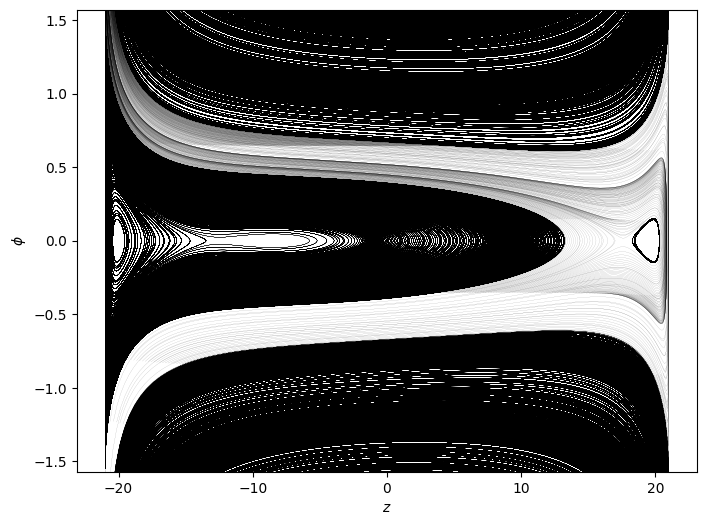

In [29]:
############### GENERIC INITIAL AND FINAL TIME ###############
t_init = 0
t_final = 2000
i_0 = np.argmin(np.abs(t_light - t_init))
i_f = np.argmin(np.abs(t_light - t_final))

############### GRAFICO DE P1, P2 Y P EN EL TIEMPO ###############

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(z_variable, np.unwrap(arg_variable, axis=0), color="k", lw=0.05)
ax.set_ylim([-np.pi / 2, np.pi / 2])
ax.set_xlabel('$z$')
ax.set_ylabel(r'$\phi$')

17.262085323370613
-10.100515347677705
10.100515347677705
-17.262085323370613
21.57150859880764
(-4.949224218197634e-16-8.082696532001679j)
(4.949224218197634e-16+8.082696532001679j)
-21.57150859880764


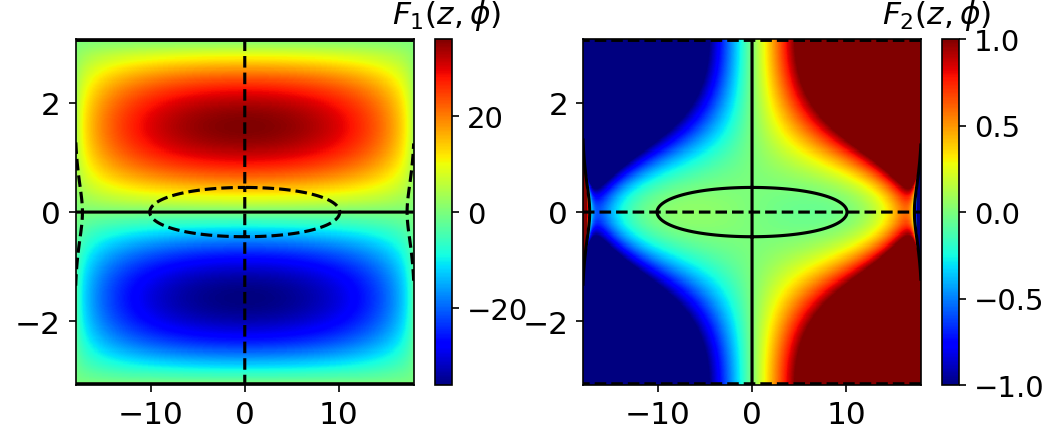

In [133]:
N = 18
gamma = 10
k = 1
beta = 0.0
delta = 0.0
n = 0
z_pp_0 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mm_0 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_pm_0 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mp_0 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
n = 1
z_pp_1 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mm_1 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_pm_1 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mp_1 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5

print(z_pp_0)
print(z_mm_0)
print(z_pm_0)
print(z_mp_0)

print(z_pp_1)
print(z_mm_1)
print(z_pm_1)
print(z_mp_1)

# PARAMETROS INICIALES (P = CANTIDAD CONSERVADA, X = PORCENTAJE DE INFORMACIÓN INICIAL EN DIMERO 2) ####### Vale pico esto, encuentra los puntos estacionarios como la gente
dz = 0.02
dphi = 0.02
z = np.arange(- N + dz, N - dz, dz) #
phi = np.arange(-np.pi - dphi, np.pi + dphi, 0.02)#n * np.pi
Z, PHI = np.meshgrid(z, phi)
F1 = 2 * k * np.sqrt(N ** 2 - Z ** 2) * np.sin(PHI)
#F2 = Z * np.cos(PHI) * ((N + 2) ** 2 - Z ** 2) - 2 * gamma * Z * np.sqrt(N ** 2 - Z ** 2) + delta * np.sqrt(N ** 2 - Z ** 2) * ((N + 2) ** 2 - Z ** 2)
F2 = - ((2 * k * Z) / (np.sqrt(N ** 2 - Z ** 2))) * np.cos(PHI) + ((4 * gamma * Z) / ((N + 2) ** 2 - Z ** 2)) - 2 * delta

fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=150)

pcm = ax[0].pcolormesh(z, phi, F1, cmap="jet", shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
cbar.set_label(r'$F_1(z, \phi)$', rotation=0, size=15, labelpad=-39, y=1.12)
ax[0].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)
ax[0].contour(Z, PHI, F1, levels=[0], colors='k')
ax[0].contour(Z, PHI, F2, levels=[0], colors='k', linestyles="--")

pcm = ax[1].pcolormesh(z, phi, F2, cmap="jet", vmin=-1, vmax=1, shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
cbar.set_label(r'$F_2(z, \phi)$', rotation=0, size=15, labelpad=-52, y=1.12)
ax[1].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)
ax[1].contour(Z, PHI, F2, levels=[0], colors='k')
ax[1].contour(Z, PHI, F1, levels=[0], colors='k', linestyles="--")
